![classify dandelions and grass, image from Unsplash](https://images.unsplash.com/photo-1508550536558-5e8d33eb9a82?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1488&q=80 "image from Unsplash")

# How to Create an Image Dataset From Google Images

*by: Binh Phan. Inspired by [Lesson 2](https://course.fast.ai/videos/?lesson=2) of FastAI. Thanks to Francisco Ingham and Jeremy Howard* 

In this tutorial, we'll create an image dataset from Google Images using some Javascript commands in the browser and a few lines in Python, using the FastAI library.

In this example, we'll create a dataset of dandelions and grass images. Let's get started!

In [1]:
from fastai.vision import *

Note: this Kaggle kernel already has the dataset created from these instructions, so if you don't want to create your own dataset, feel free to just follow along :)

**How to save a list of Google Image URLs into a csv file**

Go to Google Images and search for *grass*. Initially, there will be ~50 images, so scroll down and press the button 'Show more results' at the end of the page until ~100 images have loaded. 

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press CtrlShiftJ in Windows/Linux and CmdOptJ in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

Run the following commands in the prompt:

```
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

The browser will download the file. Name the file *grass.csv*.

Repeat the same steps above for *dandelion*, and save the respective file as *dandelion.csv*.

**Upload the URLs as a dataset in Kaggle**

In this Kaggle kernel, go to File -> Add or upload data

In the top right corner, press Upload

Now, add *grass.csv* and *dandelion.csv*. Name the dataset *greenr*.

Now, run the following commands to download the images from URLs into our dataset folder /kaggle/working/greenr/ using the *download_images* function.

These are all FastAI commands that make it really easy to create a dataset :)

In [4]:
#set the number of classes
classes = ['grass','dandelion']

In [5]:
#download grass images to the directory data/grass from the URLs in grass.csv
folder = 'grass'
file = 'grass.csv'
path = Path('data/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=200)

In [6]:
#download dandelion images to the directory data/dandelion from the URLs in dandelion.csv
folder = 'dandelion'
file = 'dandelion.csv'
path = Path('data/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=200)

Then, we'll make sure all the images are valid using *verify_images*.

In [7]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

grass


dandelion


After that, we'll create our dataset from *ImageDataBunch* using the folder of images we just created, in just one line:

In [8]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Now let's view our data and see that we have a dataset. Congrats, you now have created your own image dataset!

In [9]:
data.classes

['dandelion', 'grass']

/srv/conda/envs/notebook/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/srv/conda/envs/notebook/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The defaul

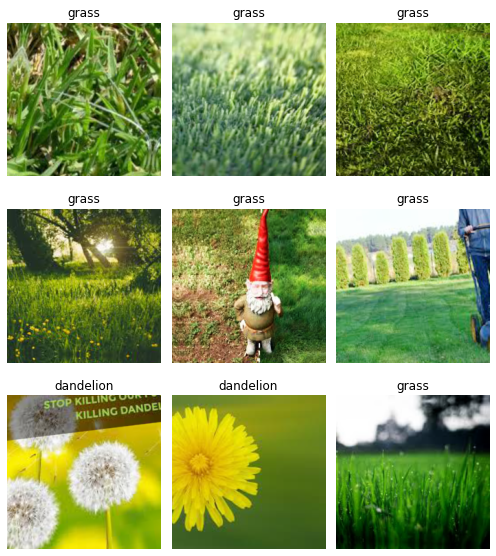

In [10]:
data.show_batch(rows=3, figsize=(7,8))

In [11]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['dandelion', 'grass'], 2, 320, 80)